# Zillow Regression Project
***

__Project Goals__

* Predict the values of single unit properties that the tax district assesses using the property data from those with a transaction during the "hot months" (in terms of real estate demand) of May-August, 2017.
* Determine the state and county location of each property.
* Calculate and chart the tax rate distributions for each county.

***

__Overall Findings__

* All properties are located in California.
* All properties exist in either Los Angelas, Orange, or Ventura county.
* The individual county tax rates have been calculated and their distributions plotted at the end of the Wrangle section of this notebook.
* My best model was a LassoLars model with an alpha of 31. It outperformed all others, including the baseline, and had a validate RMSE of 232,872.79

***

__My Process__

* Write a README.md file that details my process, my findings, and instructions on how to recreate my project.
* Acquire the zillow data from the Codeup Database
* Clean and prepare the zillow data:
    - Select only the useful columns
    - Remove or impute null values
    - Rename columns as necessary
    - Change data types as necessary
    - Calculate county_tax_rate
    - Create county and state columns
    - Remove entries that don't make sense or are illegal
    - Remove outliers
* Plot individual variable distributions
* Plot county_tax_rate distributions ( A Project Goal )
* Determine at least two initial hypotheses, run the statistical tests needed, evaluate the outcome, and record results.
* Split the data sets into X and y groups and scale the X groups before use in the model.
* Set baseline using tax_value mean or median.
* Create and evaluate models on train and validate sets
* Choose best model and evaluate it on test data set
* Document conclusions, takeaways, and next steps in the Final Report Notebook.
***

### Necessary Imports
***

In [1]:
import numpy as np
import pandas as pd

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#For stats
import scipy.stats as stats

#Custom modules
import env
import wrangle
import explore
import model

### Acquire Data
***

__Data Dictionary__

| Target | Datatype | Definition |
|:-------|:---------|:------------|
| tax_value | int | The assessed value of the property |

| Feature | Datatype | Definition |
|:--------|:---------|:------------|
| bedroom_count | int | The number of bedrooms in the property |
| bathroom_count | float | The number of bathrooms in the property (Includes values for half baths and other combinations) |
| home_area | int | The area of the property in square feet |
| county | str | The name of the county the property resides in |
| tax_amount | float | The amount of tax paid (Used to calculate county_tax_rate) |
| state | str | The name of the state the property resides in |
| county_tax_rate | float | The tax rate applied to the property (Calculated using tax_amount and tax_value) |

***

__Retrieve the Zillow Data From the Codeup Database__

In [2]:
zillow = wrangle.wrangle_zillow()

***
__Get a Brief Overview of the Data__

In [3]:
zillow.head()

,bedroom_count,bathroom_count,home_area,county,latitude,longitude,year_built,tax_value,tax_amount,state,county_tax_rate
0,3,2.0,1125,Orange,33922098.0,-117954970.0,1974,289445,3490.16,California,0.012058
1,3,2.0,1316,Los Angelas,34033180.0,-118355396.0,1923,205123,2627.48,California,0.012809
2,3,2.0,1458,Los Angelas,34686163.0,-118113100.0,1970,136104,2319.90,California,0.017045
3,3,2.0,1766,Los Angelas,34073222.0,-118390965.0,1980,810694,9407.01,California,0.011604
4,2,1.0,1421,Los Angelas,33999877.0,-118291863.0,1911,35606,543.69,California,0.015270


In [4]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31996 entries, 0 to 38597
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    31996 non-null  int64  
 1   bathroom_count   31996 non-null  float64
 2   home_area        31996 non-null  int64  
 3   county           31996 non-null  object 
 4   latitude         31996 non-null  float64
 5   longitude        31996 non-null  float64
 6   year_built       31996 non-null  int64  
 7   tax_value        31996 non-null  int64  
 8   tax_amount       31996 non-null  float64
 9   state            31996 non-null  object 
 10  county_tax_rate  31996 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 2.9+ MB


In [5]:
zillow.describe()

,bedroom_count,bathroom_count,home_area,latitude,longitude,year_built,tax_value,tax_amount,county_tax_rate
count,31996.000000,31996.000000,31996.000000,3.199600e+04,3.199600e+04,31996.000000,3.199600e+04,31996.000000,31996.000000
mean,2.886455,2.092887,1562.838417,3.399553e+07,-1.181983e+08,1968.529816,3.862194e+05,4687.237447,0.012543
std,0.895832,0.658600,572.834818,2.598972e+05,3.715644e+05,21.854135,2.343864e+05,2714.524002,0.001633
min,1.000000,1.000000,242.000000,3.333960e+07,-1.194484e+08,1900.000000,1.543300e+04,138.540000,0.007156
25%,2.000000,2.000000,1144.000000,3.379878e+07,-1.184229e+08,1954.000000,2.119935e+05,2706.255000,0.011609
50%,3.000000,2.000000,1454.000000,3.400316e+07,-1.181643e+08,1970.000000,3.474565e+05,4229.935000,0.012233
75%,3.000000,2.500000,1879.000000,3.417665e+07,-1.179086e+08,1985.000000,5.127010e+05,6146.410000,0.013143
max,5.000000,3.000000,3732.000000,3.481877e+07,-1.175554e+08,2015.000000,1.295000e+06,14950.420000,0.018058


***
__Plot Individual Distributions__

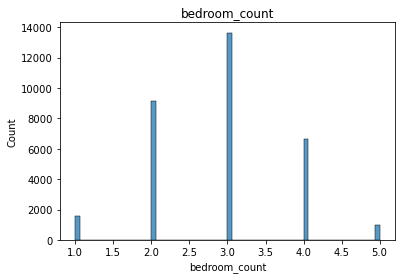

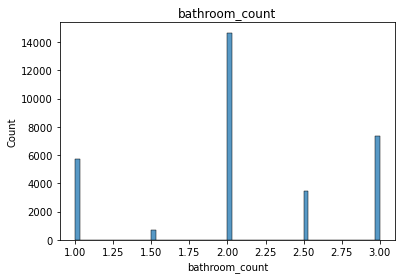

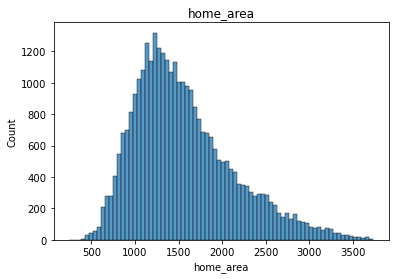

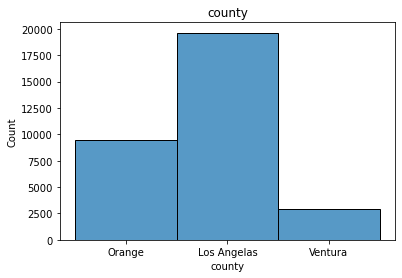

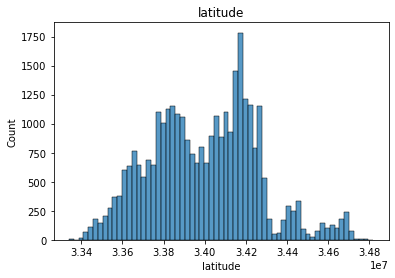

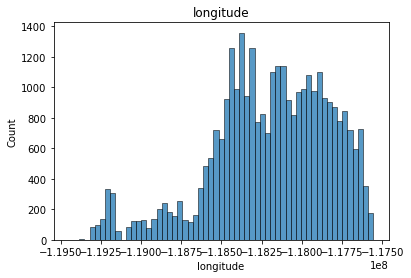

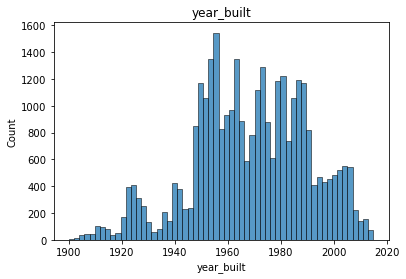

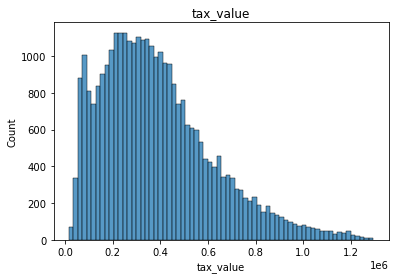

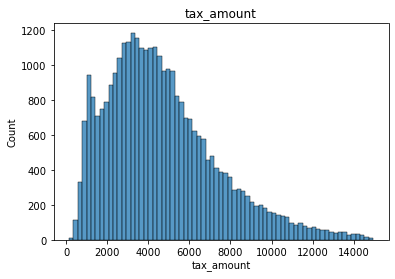

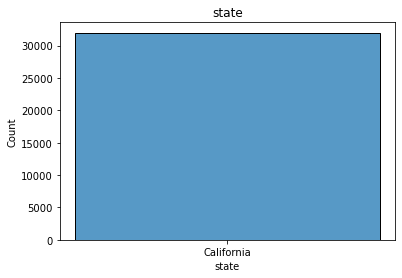

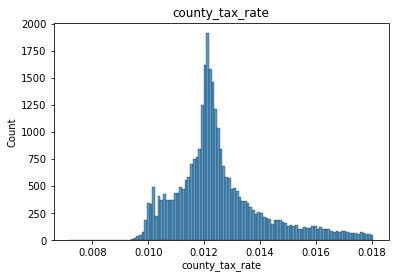

In [6]:
wrangle.get_dists(zillow)

***
__Plot the County Tax Rate Distributions__

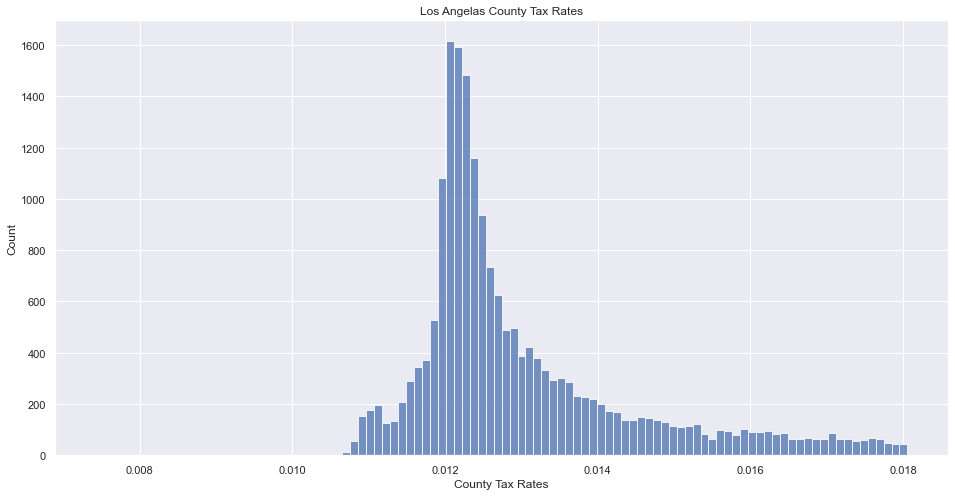

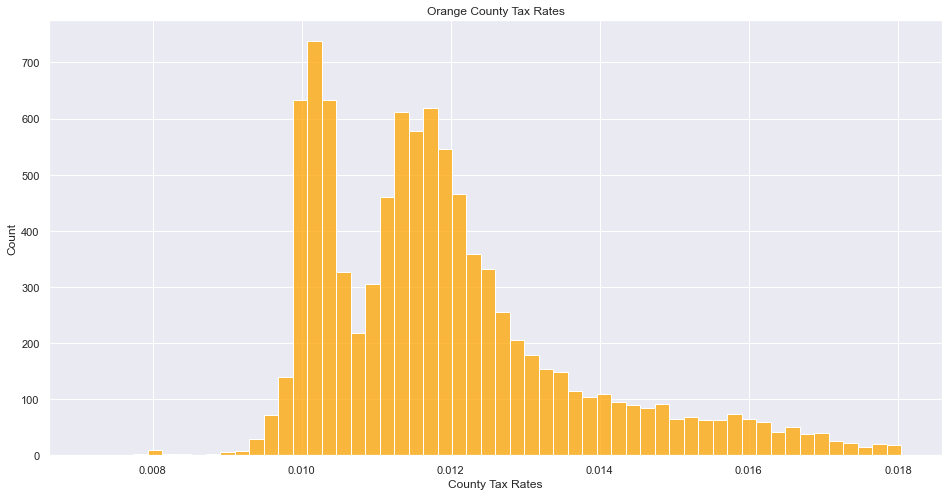

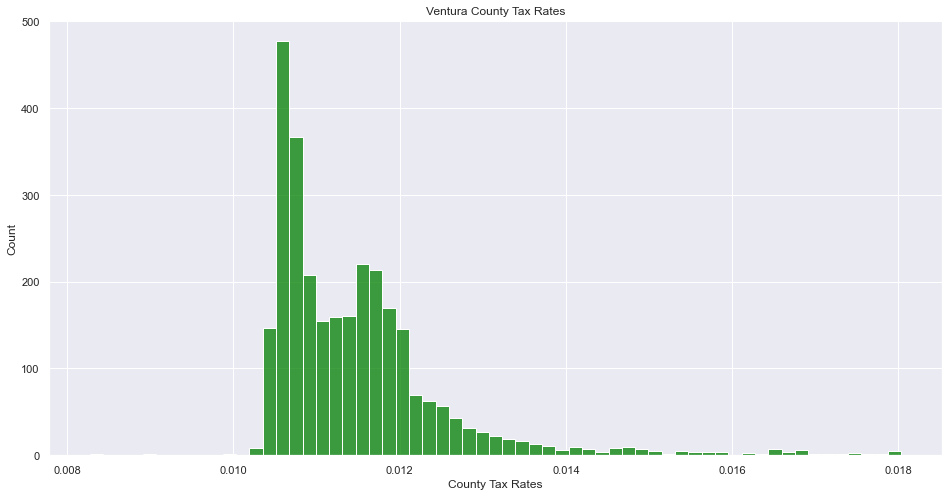

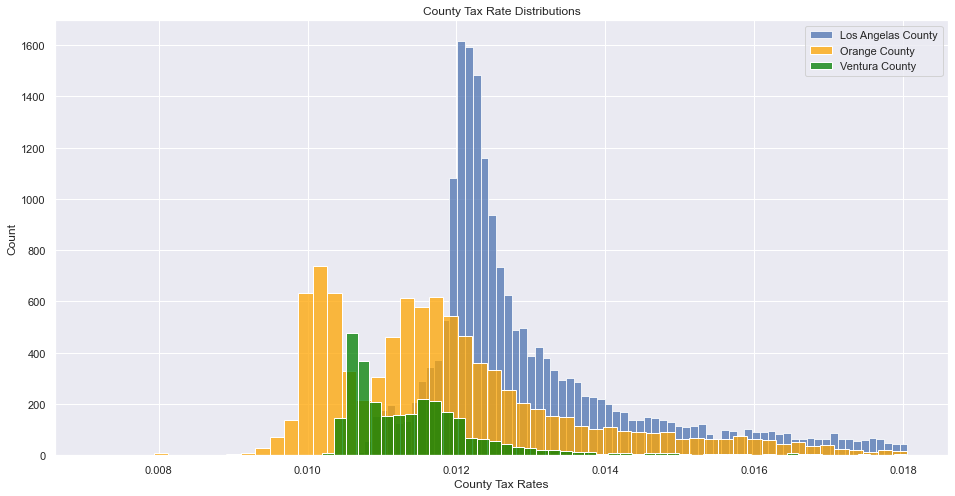

In [7]:
wrangle.get_tax_rate_dists(zillow)

***
__Split Data Into Train, Validate, and Test Datasets__

In [8]:
train, validate, test = wrangle.train_validate_test_split(zillow)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (17917, 8)
validate -> (7679, 8)
test -> (6400, 8)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17917 entries, 18660 to 2225
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   17917 non-null  int64  
 1   bathroom_count  17917 non-null  float64
 2   home_area       17917 non-null  int64  
 3   county          17917 non-null  object 
 4   latitude        17917 non-null  float64
 5   longitude       17917 non-null  float64
 6   year_built      17917 non-null  int64  
 7   tax_value       17917 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.2+ MB


Key Takeaways:
* Removed 'state', 'county_tax_rate', and 'tax_amount' from the data sets.
* There are 32,019 total entries.
* The only categorical column is 'county'

***
### Explore Data

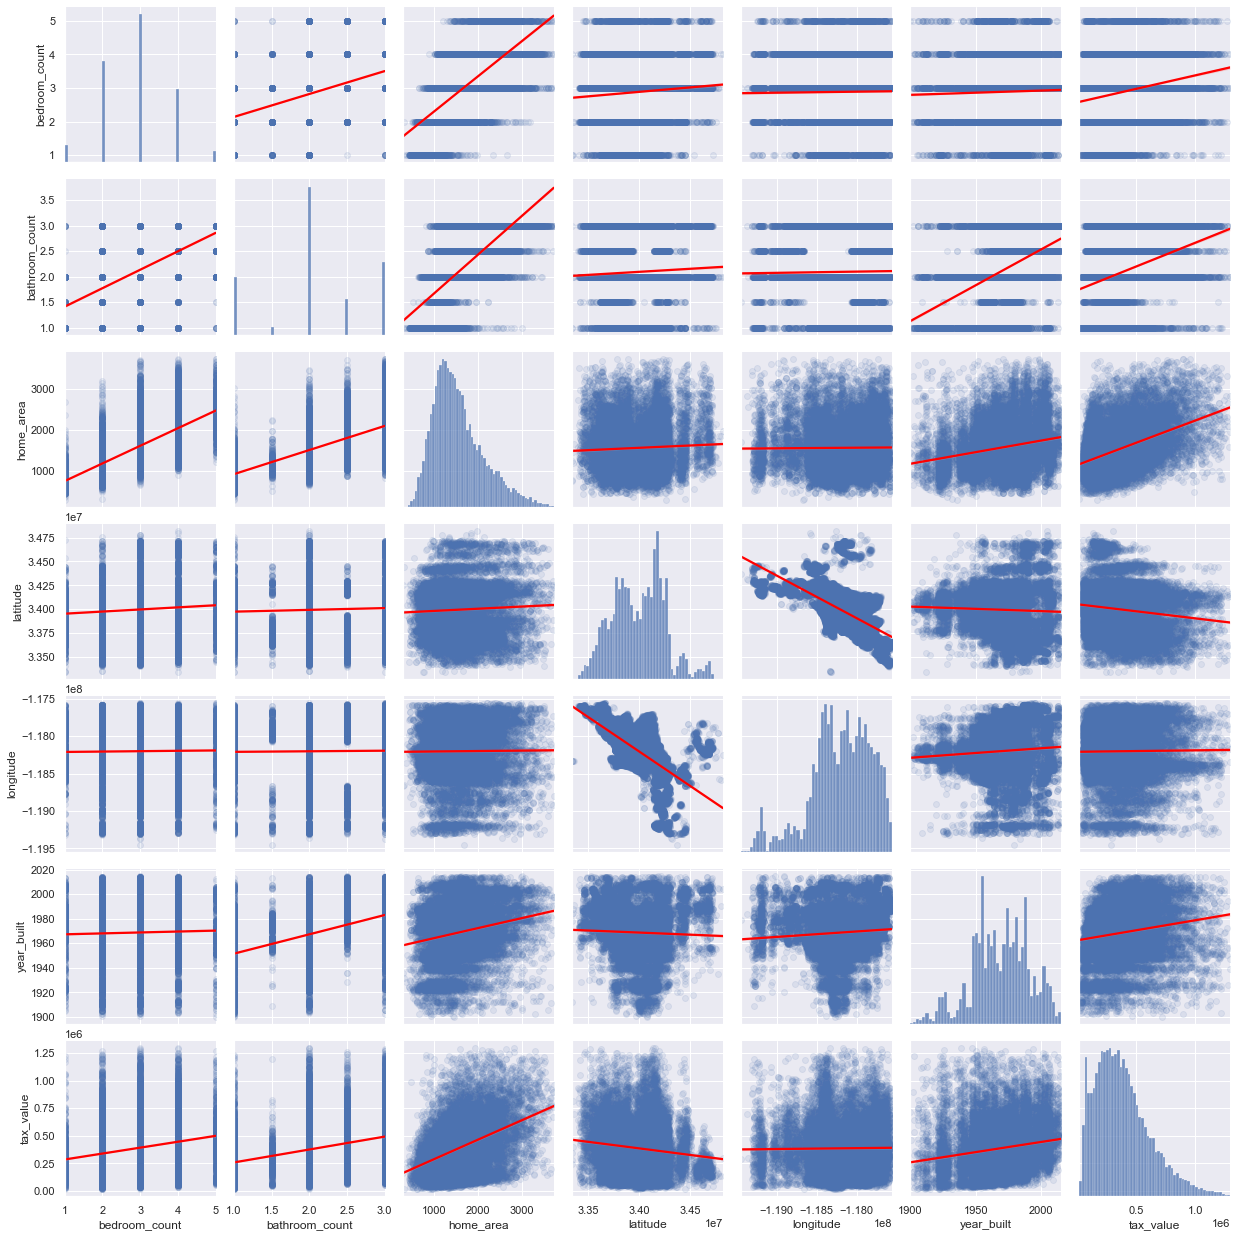

In [10]:
explore.get_pairwise_charts(train)

Key Takeaways:

* bedroom count and bathroom count have a weak positive relationship with tax_value.
* home_area has a much stronger positive linear relationship with tax_value.
* bedroom count and bathroom count have positive linear relationships with home_area, but that is expected.
* latitude has a negative relationship with tax_value.
* year_built has a postiive relationship with tax_value.

***
### Statistical Testing

__Hypothesis 1__

$H_0$: home_area is not linearly correlated with tax_value.

$H_a$: home_area is linearly correlated with tax_value.

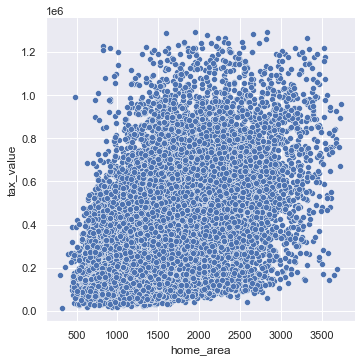

In [11]:
sns.relplot(x = 'home_area', y = 'tax_value', data = train)
plt.show()

In [12]:
alpha = 0.05

In [13]:
corr, p = stats.pearsonr(train.home_area, train.tax_value)
corr, p

(0.4371012145928819, 0.0)

In [14]:
explore.is_significant(p, alpha)

p is less than alpha, so we reject the null hypothesis.


***
__Hypothesis 2__

$H_0$: The average tax_value of Orange County properties is <= The average tax_value of Ventura County properties.
    
$H_a$: The average tax_value of Orange County properties is > The average tax_value of  Ventura County properties.

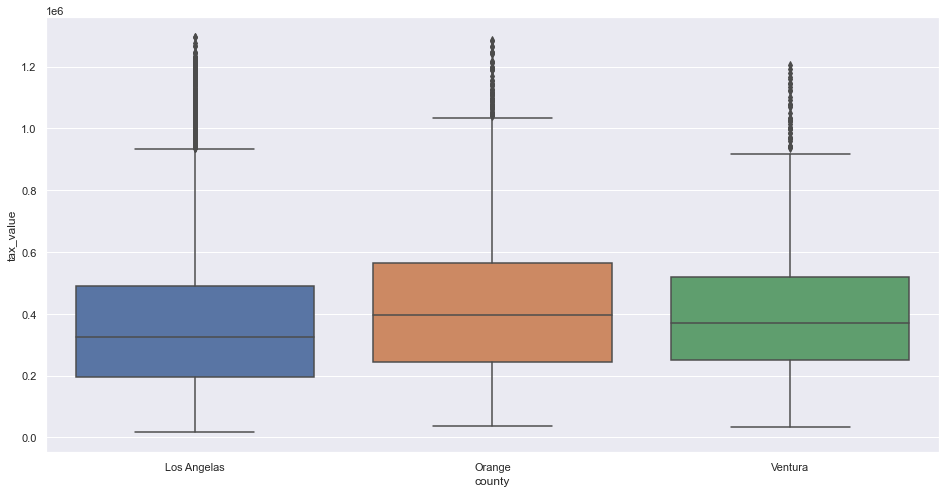

In [15]:
sns.boxplot(x = 'county', y = 'tax_value', data = train)
plt.show()

In [16]:
alpha = 0.05

In [17]:
#Make dataframes for each county to use in the next few hypothesis tests
orange_county = train[train.county == 'Orange']
ventura_county = train[train.county == 'Ventura']
la_county = train[train.county == 'Los Angelas']

In [18]:
t, p = stats.ttest_ind(orange_county.tax_value, ventura_county.tax_value)
t, p

(3.1137348440716677, 0.0018548518659647613)

In [19]:
explore.is_significant(p, alpha)

p is less than alpha, so we reject the null hypothesis.


***
__Hypothesis 3__

$H_0$: The average tax_value of Ventura County properties is <= The average tax_value of Los Angelas County properties.
    
$H_a$: The average tax_value of Ventura County properties is > The average tax_value of Los Angelas County properties.

In [20]:
alpha = 0.05

In [21]:
t, p = stats.ttest_ind(ventura_county.tax_value, la_county.tax_value)
t, p

(5.2402233429692755, 1.629695489885664e-07)

In [22]:
explore.is_significant(p, alpha)

p is less than alpha, so we reject the null hypothesis.


***
__Hypothesis 4__

$H_0$: The average tax_value of Orange County properties is <= The average tax_value of Los Angelas County properties.
    
$H_a$: The average tax_value of Orange County properties is > The average tax_value of Los Angelas County properties.

In [23]:
alpha = 0.05

In [24]:
t, p = stats.ttest_ind(orange_county.tax_value, la_county.tax_value)
t, p

(13.28370890558729, 4.653907851489065e-40)

In [25]:
explore.is_significant(p, alpha)

p is less than alpha, so we reject the null hypothesis.


***
Key Takeaways:
* home_area is linearly correlated with tax_value. This would make a good feature.
* The average tax_value of properties in Orange county is greater than the average tax_value of properties in Ventura which is greater than the average tax_value of properties in Los Angelas county.

### Model and Evaluate
***

__Create Dummy Variables for the Categorical Column__

In [26]:
train, validate, test = model.get_dummy_vars(train, validate, test)

__Split Data Into X and y Groups__

In [27]:
X_train, y_train = train.drop('tax_value', axis = 1), train.tax_value
X_validate, y_validate = validate.drop('tax_value', axis = 1), validate.tax_value
X_test, y_test = test.drop('tax_value', axis = 1), test.tax_value

__Scale the X Data Groups__

In [28]:
X_train_scaled, X_validate_scaled, X_test_scaled = model.scale_data(X_train, X_validate, X_test)


__Compare Scaled Distributions to Original Distributions__

In [29]:
#Assign the scaled columns as new columns in each set
cols_to_scale = ['bedroom_count', 'bathroom_count', 'home_area', 'latitude', 'longitude', 'year_built', 'county_Orange', 'county_Ventura']
cols_scaled = ['bedroom_count_scaled', 'bathroom_count_scaled', 'home_area_scaled', 'latitude_scaled', 'longitude_scaled', 'year_built_scaled', 'county_Orange_scaled', 'county_Ventura_scaled']

train[cols_scaled] = X_train_scaled
validate[cols_scaled] = X_validate_scaled
test[cols_scaled] = X_test_scaled

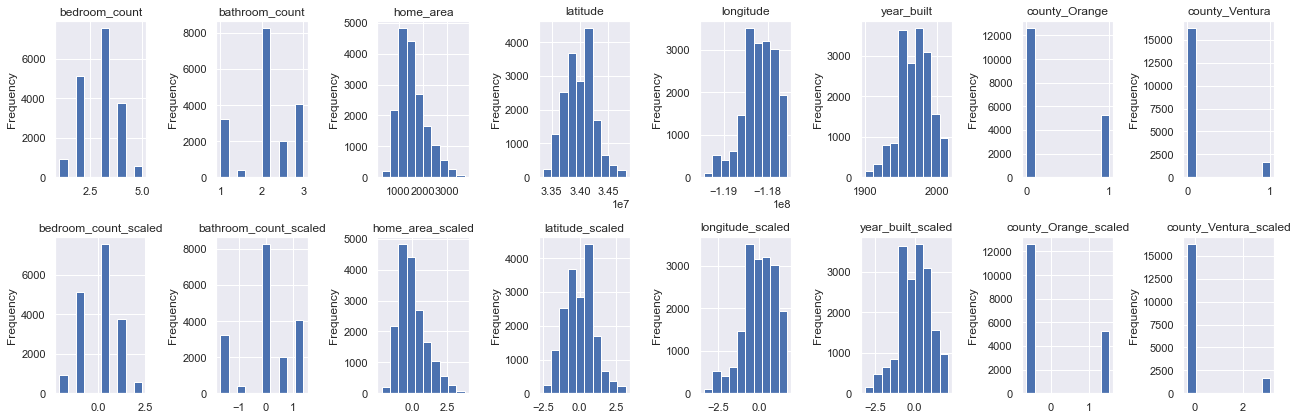

In [30]:
model.compare_dists(train, cols_to_scale, cols_scaled)

Distributions appear to be the same, so we can move forward.

__Create the Metric Dataframe__

This will store the evaluation results of all my models.

In [31]:
metric_df = pd.DataFrame()


__Create Baseline Model__

I will create the baseline model using the 'tax_value' mean.

In [32]:
y_train, y_validate, y_test, metric_df = model.get_baseline(y_train, y_validate, y_test, metric_df)

RMSE using Mean
Train/In-Sample:  233083.02 
Validate/Out-of-Sample:  232739.52 




__Create OLS Model__

In [33]:
lm, metric_df = model.get_ols_model(X_train_scaled, X_validate_scaled, y_train, y_validate, metric_df)

RMSE using OLS
Train/In-Sample:  201864.1 
Validate/Out-of-Sample:  202765.04


__Create LassoLars Models__

In [34]:
lars_models, metric_df = model.get_lars_models(X_train_scaled, X_validate_scaled, y_train, y_validate, metric_df)


RMSE using LassoLars, alpha = 1
Train/In-Sample:  201865.11 
Validate/Out-of-Sample:  202773.19

RMSE using LassoLars, alpha = 2
Train/In-Sample:  201868.13 
Validate/Out-of-Sample:  202783.4

RMSE using LassoLars, alpha = 3
Train/In-Sample:  201873.16 
Validate/Out-of-Sample:  202795.67

RMSE using LassoLars, alpha = 4
Train/In-Sample:  201880.21 
Validate/Out-of-Sample:  202809.98

RMSE using LassoLars, alpha = 5
Train/In-Sample:  201889.27 
Validate/Out-of-Sample:  202826.34

RMSE using LassoLars, alpha = 6
Train/In-Sample:  201900.34 
Validate/Out-of-Sample:  202844.76

RMSE using LassoLars, alpha = 7
Train/In-Sample:  201913.42 
Validate/Out-of-Sample:  202865.22

RMSE using LassoLars, alpha = 8
Train/In-Sample:  201928.52 
Validate/Out-of-Sample:  202887.73

RMSE using LassoLars, alpha = 9
Train/In-Sample:  201945.63 
Validate/Out-of-Sample:  202912.3

RMSE using LassoLars, alpha = 10
Train/In-Sample:  201964.75 
Validate/Out-of-Sample:  202938.91

RMSE using LassoLars, alpha = 

__Create GLM, TweedieRegressor Model__

In [35]:
glm, metric_df = model.get_glm_model(X_train_scaled, X_validate_scaled, y_train, y_validate, metric_df)


RMSE for Power = 0, Alpha = 1

Train/In-Sample:  211106.05 
Validate/Out-of-Sample:  212126.71

RMSE for Power = 0, Alpha = 2

Train/In-Sample:  215445.22 
Validate/Out-of-Sample:  216207.45

RMSE for Power = 0, Alpha = 3

Train/In-Sample:  218251.95 
Validate/Out-of-Sample:  218828.43

RMSE for Power = 0, Alpha = 4

Train/In-Sample:  220275.98 
Validate/Out-of-Sample:  220717.79

RMSE for Power = 0, Alpha = 5

Train/In-Sample:  221813.32 
Validate/Out-of-Sample:  222154.0

RMSE for Power = 0, Alpha = 6

Train/In-Sample:  223022.07 
Validate/Out-of-Sample:  223284.32

RMSE for Power = 0, Alpha = 7

Train/In-Sample:  223997.55 
Validate/Out-of-Sample:  224197.31

RMSE for Power = 0, Alpha = 8

Train/In-Sample:  224801.26 
Validate/Out-of-Sample:  224950.12

RMSE for Power = 0, Alpha = 9

Train/In-Sample:  225474.82 
Validate/Out-of-Sample:  225581.43

RMSE for Power = 0, Alpha = 10

Train/In-Sample:  226047.38 
Validate/Out-of-Sample:  226118.4

RMSE for Power = 1, Alpha = 1

Train/In-

__Create Polynomial Features and Model__

In [36]:
poly_test_features, lm2, metric_df = model.get_polynomial_model(X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, metric_df)

RMSE for Polynomial Features, degree = 2
Train/In-Sample:  194919.37 
Validate/Out-of-Sample:  196438.96
RMSE for Polynomial Features, degree = 3
Train/In-Sample:  190368.79 
Validate/Out-of-Sample:  192815.02
RMSE for Polynomial Features, degree = 4
Train/In-Sample:  186044.69 
Validate/Out-of-Sample:  191508.38
RMSE for Polynomial Features, degree = 5
Train/In-Sample:  179769.16 
Validate/Out-of-Sample:  193702.55


__Evaluate and Choose Best Model__

In [37]:
metric_df

,model,RMSE_validate,r^2_validate
0,validate_baseline_mean,232739.517225,0.000000
1,validate_ols,202765.035462,0.240868
2,validate_lars_alpha_1,202773.193765,0.240807
3,validate_lars_alpha_2,202783.404000,0.240730
4,validate_lars_alpha_3,202795.665858,0.240638
5,validate_lars_alpha_4,202809.978966,0.240531
6,validate_lars_alpha_5,202826.342891,0.240408
7,validate_lars_alpha_6,202844.757135,0.240270
8,validate_lars_alpha_7,202865.221141,0.240117
9,validate_lars_alpha_8,202887.734288,0.239948


After testing several models, I will choose the Polynomial model with a degree of 3. I chose this model because it had the least indication of being overfit and nearly the lowest RMSE and highest variance values.

__Evaluate On Test__

In [38]:
#Create the metric_df
test_metric = pd.DataFrame()

In [39]:
#Select the model
best_model = lm2[1]['poly_degree_3']

In [40]:
#Make predictions
y_test['poly_preds_3'] = best_model.predict(poly_test_features[1])

In [41]:
#Evaluate test predictions
test_metric = model.make_metric_df(y_test.tax_value, y_test['poly_preds_3'], 'Best_Model', test_metric)
test_metric

,model,RMSE_validate,r^2_validate
0,Best_Model,194207.715588,0.344976


After evaluating on the test data set, my best model had an RMSE of about $194,208. It also had a variance of about 34%.

__Plot the Predictions__

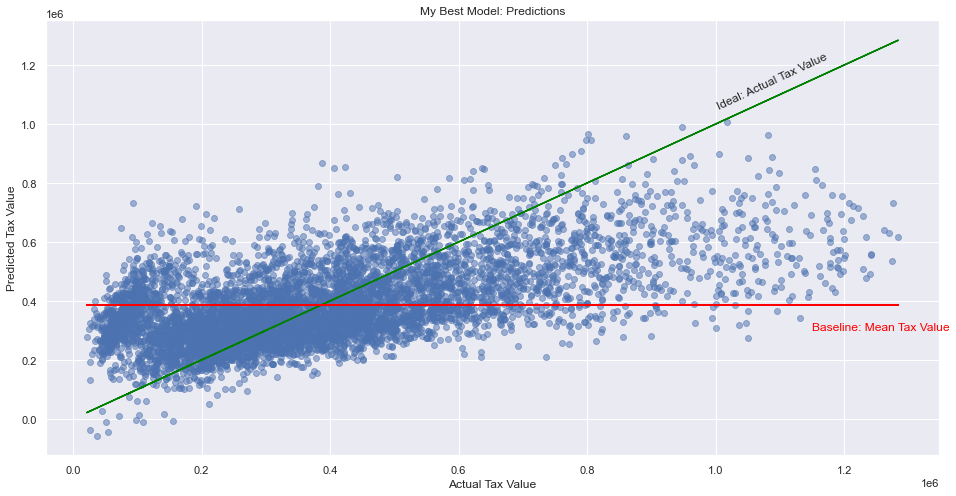

In [42]:
model.plot_predictions(y_test)

__Plot the Residuals__

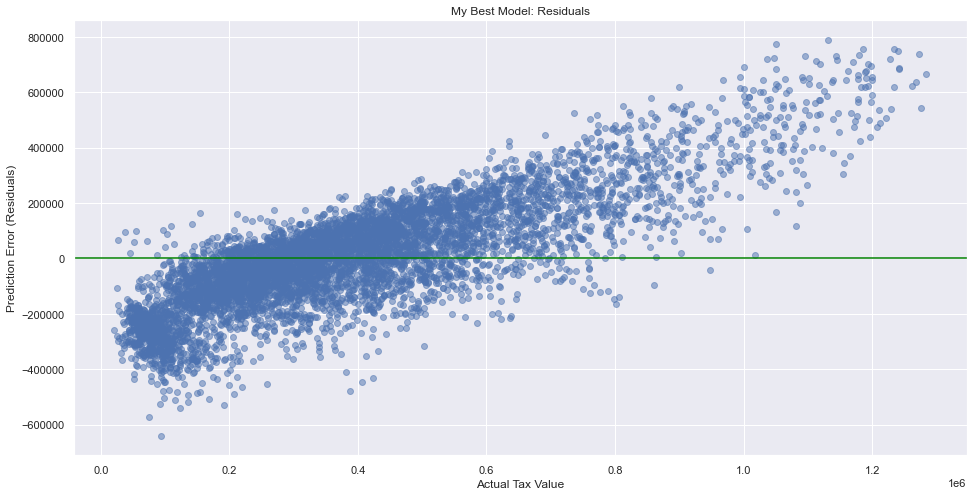

In [43]:
model.plot_residuals(y_test)

### Conclusion
***

* All properties are located in California.
* All properties exist in either Los Angelas, Orange, or Ventura county.
* The individual county tax rates have been calculated and their distributions plotted at the end of the Wrangle section of this notebook.
* My best model was a Polynomial model with a degree of 4. After evaluating on the test data set, this model had an RMSE of about $194,208. It also had a variance of about 34%.

### With More Time...
***

* I would like to add features like population densities per county, and average household income per county. I believe adding more variables like these would improve my model.